<a href="https://colab.research.google.com/github/malgsujd28/data-science/blob/main/preprocessing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Przedstawienie danych**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import seaborn as sns

In [ ]:
data = pd.read_excel('Bagietki.xlsx')

In [ ]:
data.head()

,Miejsce zakupu,Data zakupu,Ilość bagietek,Ocena klienta (kategoria),Średnica (cm),Długość (cm),Cena (EUR),Pora dnia,Pogoda
0,Boulangerie du Coin,2024-05-02,3.0,Doskonała,5.0,30.0,2.5,Rano,Słonecznie
1,Le Pain Quotidien,2024-05-01,2.0,Dobra,6.0,25.0,3.0,Południe,Deszcz
2,La Boulangerie de Paris,2024-04-30,1.0,Doskonała,4.5,28.0,2.2,Popołudnie,Pochmurno
3,Paul,2024-04-29,3.0,Przeciętna,6.5,32.0,2.8,Wieczór,Słonecznie
4,Boulangerie de la Rue,2024-04-28,4.0,Dobra,5.5,29.0,2.6,Rano,Pochmurno


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Miejsce zakupu              76 non-null     object 
 1    Data zakupu                 76 non-null     object 
 2    Ilość bagietek              66 non-null     float64
 3    Ocena klienta (kategoria)   76 non-null     object 
 4    Średnica (cm)               76 non-null     float64
 5    Długość (cm)                70 non-null     float64
 6    Cena (EUR)                  76 non-null     float64
 7    Pora dnia                   76 non-null     object 
 8    Pogoda                      76 non-null     object 
dtypes: float64(4), object(5)
memory usage: 5.5+ KB


In [ ]:
data[' Ocena klienta (kategoria) '].value_counts()

 Ocena klienta (kategoria) 
 Przeciętna                    30
 Doskonała                     24
 Dobra                         22
Name: count, dtype: int64

Oddzielamy zmienną zależną.

In [ ]:
y=data[' Ocena klienta (kategoria) ']

Zmieniamy nazw kolumn, aby usunąć niepotrzebne spacje.

In [ ]:
data = data.rename(columns={' Miejsce zakupu ': 'Miejsce zakupu'})
data = data.rename(columns={' Data zakupu ': 'Data zakupu'})
data = data.rename(columns={' Ilość bagietek ': 'Ilość bagietek'})
data = data.rename(columns={' Ocena klienta (kategoria) ': 'Ocena klienta (kategoria)'})
data = data.rename(columns={' Średnica (cm) ': 'Średnica (cm)'})
data = data.rename(columns={' Długość (cm) ': 'Długość (cm)'})
data = data.rename(columns={' Cena (EUR) ': 'Cena (EUR)'})
data = data.rename(columns={' Pora dnia ': 'Pora dnia'})
data = data.rename(columns={' Pogoda ': 'Pogoda'})
data.head()

,Miejsce zakupu,Data zakupu,Ilość bagietek,Ocena klienta (kategoria),Średnica (cm),Długość (cm),Cena (EUR),Pora dnia,Pogoda
0,Boulangerie du Coin,2024-05-02,3.0,Doskonała,5.0,30.0,2.5,Rano,Słonecznie
1,Le Pain Quotidien,2024-05-01,2.0,Dobra,6.0,25.0,3.0,Południe,Deszcz
2,La Boulangerie de Paris,2024-04-30,1.0,Doskonała,4.5,28.0,2.2,Popołudnie,Pochmurno
3,Paul,2024-04-29,3.0,Przeciętna,6.5,32.0,2.8,Wieczór,Słonecznie
4,Boulangerie de la Rue,2024-04-28,4.0,Dobra,5.5,29.0,2.6,Rano,Pochmurno


# **Czyszczenie danych**

Tworzymy nową tabelkę bez zmiennej zależnej.

In [ ]:
X=data.drop(['Ocena klienta (kategoria)'], axis=1)
X.head()

,Miejsce zakupu,Data zakupu,Ilość bagietek,Średnica (cm),Długość (cm),Cena (EUR),Pora dnia,Pogoda
0,Boulangerie du Coin,2024-05-02,3.0,5.0,30.0,2.5,Rano,Słonecznie
1,Le Pain Quotidien,2024-05-01,2.0,6.0,25.0,3.0,Południe,Deszcz
2,La Boulangerie de Paris,2024-04-30,1.0,4.5,28.0,2.2,Popołudnie,Pochmurno
3,Paul,2024-04-29,3.0,6.5,32.0,2.8,Wieczór,Słonecznie
4,Boulangerie de la Rue,2024-04-28,4.0,5.5,29.0,2.6,Rano,Pochmurno


Liczymy ilość pustych wartości dla wszystkich kolumn.

In [ ]:
X.isnull().sum()

 Miejsce zakupu             0
Data zakupu                 0
Ilość bagietek             10
Średnica (cm)               0
Długość (cm)                6
Cena (EUR)                  0
Pora dnia                   0
 Pogoda                     0
dtype: int64

Zamieniamy wartości puste dla ilości bagietek na medianę.

In [ ]:
X["Ilość bagietek"].fillna(X["Ilość bagietek"].median(), inplace=True)
X.isnull().sum()

 Miejsce zakupu            0
Data zakupu                0
Ilość bagietek             0
Średnica (cm)              0
Długość (cm)               6
Cena (EUR)                 0
Pora dnia                  0
 Pogoda                    0
dtype: int64

Zamieniamy wartości puste dla długości na średnią.

In [ ]:
X["Długość (cm)"].fillna(X["Długość (cm)"].mean(), inplace=True)
X.isnull().sum()

 Miejsce zakupu            0
Data zakupu                0
Ilość bagietek             0
Średnica (cm)              0
Długość (cm)               0
Cena (EUR)                 0
Pora dnia                  0
 Pogoda                    0
dtype: int64

# **Outliery**

Wykonujemy detekcję outlierów - wartości poniżej Q1-1.5(Q3-Q1) lub powyżej Q3+1.5(Q3-Q1)

In [ ]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=X.loc[:,X.columns != 'class_type'], orient='h', palette='rainbow')

NameError: name 'plt' is not defined

In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
tukey_indices, tukey_values = find_outliers_tukey(X['Ilość bagietek'])
print(tukey_indices)
tukey_indices, tukey_values = find_outliers_tukey(X['Średnica (cm)'])
print(tukey_indices)
tukey_indices, tukey_values = find_outliers_tukey(X['Długość (cm)'])
print(tukey_indices)
tukey_indices, tukey_values = find_outliers_tukey(X['Cena (EUR)'])
print(tukey_indices)

[]
[]
[]
[]


Z detekcji wyszło, że nie ma outlierów w zbiorze danych.

# Rozkład zmiennych



Tworzymy histogramy rozkładu wartości dla danych cech, aby zaprezentować jak rozkłada się dana cecha.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
plot_histogram(X['Ilość bagietek'])

NameError: name 'plot_histogram' is not defined

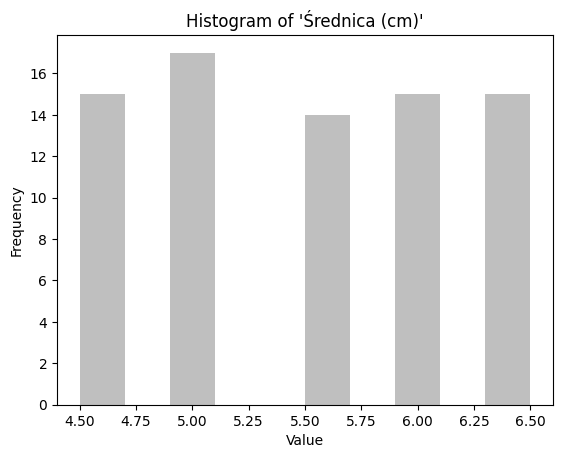

In [ ]:
plot_histogram(X['Średnica (cm)'])

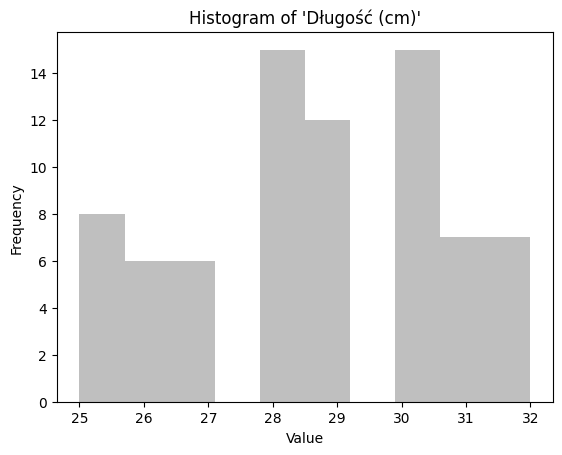

In [ ]:
plot_histogram(X['Długość (cm)'])

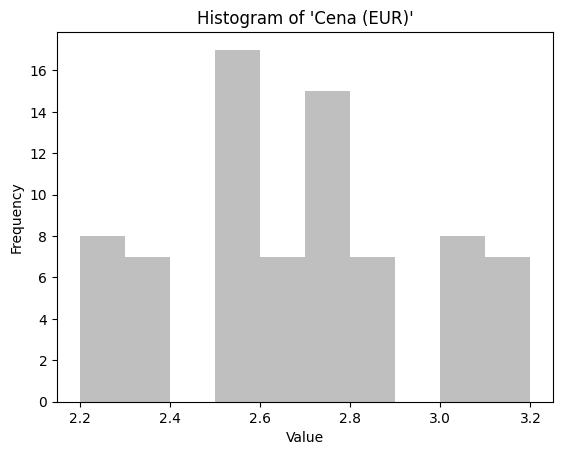

In [ ]:
plot_histogram(X['Cena (EUR)'])

# Interakcje między cechami

Sprawdzamy ile kategorii znajduje się w poszczególnych kolumnach i jakie interakcje następują.

In [ ]:
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature ' Miejsce zakupu        ' has 10 unique categories
Feature 'Data zakupu' has 10 unique categories
Feature 'Pora dnia' has 4 unique categories
Feature ' Pogoda     ' has 3 unique categories


In [ ]:
todummy_list = []
for col_name in X.columns:
  if X[col_name].dtypes == 'object':
    todummy_list.append(col_name)

todummy_list

[' Miejsce zakupu        ', 'Data zakupu', 'Pora dnia', ' Pogoda     ']

In [ ]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        del df[x]
        df = pd.concat([df, dummies], axis=1)
    return df

In [ ]:
X = dummy_df(X, todummy_list)
print(X.head(5))

   Ilość bagietek  Średnica (cm)  Długość (cm)  Cena (EUR)  \
0             3.0            5.0          30.0         2.5   
1             2.0            6.0          25.0         3.0   
2             1.0            4.5          28.0         2.2   
3             3.0            6.5          32.0         2.8   
4             4.0            5.5          29.0         2.6   

    Miejsce zakupu        _ Boulangerie Paulin      \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

    Miejsce zakupu        _ Boulangerie de la Rue   \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                               

In [ ]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]

    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)

    return df

In [ ]:
X = add_interactions(X)
print(X.head(5))

   Ilość bagietek  Średnica (cm)  Długość (cm)  Cena (EUR)  \
0             3.0            5.0          30.0         2.5   
1             2.0            6.0          25.0         3.0   
2             1.0            4.5          28.0         2.2   
3             3.0            6.5          32.0         2.8   
4             4.0            5.5          29.0         2.6   

    Miejsce zakupu        _ Boulangerie Paulin      \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

    Miejsce zakupu        _ Boulangerie de la Rue   \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                               

# PCA

Wykonujemy analizę głównych komponentów.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X
pca = PCA(n_components=10) #deklaratywna ilosc komponentów
X_pca = pd.DataFrame(pca.fit_transform(X))

In [ ]:
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.14645926, 0.13122873, 0.12718163, 0.12030307, 0.10816149,
       0.09717068, 0.08879766, 0.0871556 , 0.08414926, 0.00477451])

In [ ]:
pca = PCA(n_components=9) #wybrana ilosc komponentów
X_pca = pd.DataFrame(pca.fit_transform(X))

In [ ]:
print(X_pca.head(5))

           0         1          2         3         4         5         6  \
0  -3.258093 -0.354591  -6.495416 -3.949016 -6.719185  0.428864  6.559480   
1  11.007097  0.808439   0.052151  7.670914 -4.268609  4.557620  0.044630   
2  -0.864520  2.507223  10.185627 -4.434504 -3.853134 -1.065505 -2.966743   
3  -5.010531 -7.260791  -3.776325  5.102226  3.991962  0.426958 -4.230825   
4  -3.154510  9.416488  -3.080640 -2.700785  1.971019  5.678999 -5.123296   

          7         8  
0  1.095837 -2.360588  
1 -0.378990 -0.498372  
2 -1.340815 -5.768190  
3  1.969274 -6.187460  
4  5.741127  3.221819  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.70, random_state=1)

In [ ]:
print(data.shape)
print(X_pca.shape)

(76, 9)
(76, 9)
